In [537]:
import numpy as np
import pandas as pd
import xlrd
import xlwt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import jupyterlab
%matplotlib inline

In [538]:
#training = pd.read_csv('training_data.csv', encoding = "latin")
training = pd.read_csv('test_data.csv', encoding = "latin")

In [539]:
training = training.fillna('NOTHING')

In [540]:
training['AVERAGE_CLOUDINESS'].value_counts()

NOTHING              599
céu claro            345
céu pouco nublado    109
algumas nuvens        98
nuvens quebrados      96
nuvens quebradas      95
nuvens dispersas      94
céu limpo             27
tempo nublado         20
nublado               17
Name: AVERAGE_CLOUDINESS, dtype: int64

In [541]:
training.loc[training.AVERAGE_CLOUDINESS == 'céu claro', 'AVERAGE_CLOUDINESS'] = 'céu limpo'
training.loc[training.AVERAGE_CLOUDINESS == 'nuvens dispersas', 'AVERAGE_CLOUDINESS'] = 'nuvens quebradas'
training.loc[training.AVERAGE_CLOUDINESS == 'nuvens quebrados', 'AVERAGE_CLOUDINESS'] = 'nuvens quebradas'
training.loc[training.AVERAGE_CLOUDINESS == 'algumas nuvens', 'AVERAGE_CLOUDINESS'] = 'nuvens quebradas'
training.loc[training.AVERAGE_CLOUDINESS == 'tempo nublado', 'AVERAGE_CLOUDINESS'] = 'nublado'

In [542]:
training['AVERAGE_CLOUDINESS'].value_counts()

NOTHING              599
nuvens quebradas     383
céu limpo            372
céu pouco nublado    109
nublado               37
Name: AVERAGE_CLOUDINESS, dtype: int64

In [543]:
training['AVERAGE_CLOUDINESS'] = pd.Categorical(training['AVERAGE_CLOUDINESS'])

In [544]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   city_name                1500 non-null   object  
 1   record_date              1500 non-null   object  
 2   AVERAGE_FREE_FLOW_SPEED  1500 non-null   float64 
 3   AVERAGE_TIME_DIFF        1500 non-null   float64 
 4   AVERAGE_FREE_FLOW_TIME   1500 non-null   float64 
 5   LUMINOSITY               1500 non-null   object  
 6   AVERAGE_TEMPERATURE      1500 non-null   float64 
 7   AVERAGE_ATMOSP_PRESSURE  1500 non-null   float64 
 8   AVERAGE_HUMIDITY         1500 non-null   float64 
 9   AVERAGE_WIND_SPEED       1500 non-null   float64 
 10  AVERAGE_CLOUDINESS       1500 non-null   category
 11  AVERAGE_PRECIPITATION    1500 non-null   float64 
 12  AVERAGE_RAIN             1500 non-null   object  
dtypes: category(1), float64(8), object(4)
memory usage: 142.4+ KB


In [545]:
training['record_date'] = pd.to_datetime(training['record_date'])
training['weekday'] = training['record_date'].dt.dayofweek
training['hour'] = training['record_date'].dt.hour
training['month'] = training['record_date'].dt.month
#training['year'] = training['record_date'].dt.year
#training['day'] = training['record_date'].dt.day

In [546]:
training['unique_id'] = training.index + 1

In [547]:
#trainingWork = training.drop(['AVERAGE_PRECIPITATION','city_name','record_date','AVERAGE_RAIN','AVERAGE_SPEED_DIFF'],axis=1)
trainingWork = training.drop(['AVERAGE_PRECIPITATION','city_name','record_date','AVERAGE_RAIN'],axis=1)

In [548]:
training.head()

,city_name,record_date,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN,weekday,hour,month,unique_id
0,Porto,2019-02-13 23:00:00,39.2,0.0,91.0,DARK,8.0,1026.0,71.0,1.0,céu limpo,0.0,NOTHING,2,23,2,1
1,Porto,2018-11-28 20:00:00,42.5,12.2,76.8,DARK,11.0,1020.0,93.0,4.0,nuvens quebradas,0.0,NOTHING,2,20,11,2
2,Porto,2018-08-14 05:00:00,45.9,0.0,86.3,DARK,14.0,1017.0,93.0,0.0,NOTHING,0.0,NOTHING,1,5,8,3
3,Porto,2019-07-06 17:00:00,33.2,51.7,89.9,LIGHT,22.0,1016.0,77.0,4.0,céu pouco nublado,0.0,NOTHING,5,17,7,4
4,Porto,2018-10-15 06:00:00,44.0,3.5,85.5,DARK,12.0,1004.0,100.0,9.0,NOTHING,0.0,chuva fraca,0,6,10,5


In [549]:
dummied = trainingWork.copy()

In [550]:
dummied = pd.concat([dummied,pd.get_dummies(dummied['LUMINOSITY'])],axis='columns').drop(['LUMINOSITY'],axis='columns')

In [551]:
dummied.head()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,weekday,hour,month,unique_id,DARK,LIGHT,LOW_LIGHT
0,39.2,0.0,91.0,8.0,1026.0,71.0,1.0,céu limpo,2,23,2,1,1,0,0
1,42.5,12.2,76.8,11.0,1020.0,93.0,4.0,nuvens quebradas,2,20,11,2,1,0,0
2,45.9,0.0,86.3,14.0,1017.0,93.0,0.0,NOTHING,1,5,8,3,1,0,0
3,33.2,51.7,89.9,22.0,1016.0,77.0,4.0,céu pouco nublado,5,17,7,4,0,1,0
4,44.0,3.5,85.5,12.0,1004.0,100.0,9.0,NOTHING,0,6,10,5,1,0,0


In [552]:
naCloud = dummied[training['AVERAGE_CLOUDINESS'] == 'NOTHING']

cloud = dummied[training['AVERAGE_CLOUDINESS'] != 'NOTHING']


In [553]:
naCloud.head()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,weekday,hour,month,unique_id,DARK,LIGHT,LOW_LIGHT
2,45.9,0.0,86.3,14.0,1017.0,93.0,0.0,NOTHING,1,5,8,3,1,0,0
4,44.0,3.5,85.5,12.0,1004.0,100.0,9.0,NOTHING,0,6,10,5,1,0,0
7,34.7,19.1,68.3,17.0,1015.0,67.0,2.0,NOTHING,0,19,5,8,0,1,0
8,46.5,1.3,75.4,17.0,1013.0,100.0,1.0,NOTHING,4,6,7,9,0,1,0
12,40.7,26.3,80.9,13.0,1006.0,76.0,4.0,NOTHING,0,11,11,13,0,1,0


In [554]:
naCloud = naCloud.drop(['AVERAGE_CLOUDINESS'],axis=1)

In [555]:
X = cloud.drop(['AVERAGE_CLOUDINESS'],axis=1)

y = cloud['AVERAGE_CLOUDINESS']

In [556]:
training.head()

,city_name,record_date,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN,weekday,hour,month,unique_id
0,Porto,2019-02-13 23:00:00,39.2,0.0,91.0,DARK,8.0,1026.0,71.0,1.0,céu limpo,0.0,NOTHING,2,23,2,1
1,Porto,2018-11-28 20:00:00,42.5,12.2,76.8,DARK,11.0,1020.0,93.0,4.0,nuvens quebradas,0.0,NOTHING,2,20,11,2
2,Porto,2018-08-14 05:00:00,45.9,0.0,86.3,DARK,14.0,1017.0,93.0,0.0,NOTHING,0.0,NOTHING,1,5,8,3
3,Porto,2019-07-06 17:00:00,33.2,51.7,89.9,LIGHT,22.0,1016.0,77.0,4.0,céu pouco nublado,0.0,NOTHING,5,17,7,4
4,Porto,2018-10-15 06:00:00,44.0,3.5,85.5,DARK,12.0,1004.0,100.0,9.0,NOTHING,0.0,chuva fraca,0,6,10,5


In [557]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import BorderlineSMOTE

In [558]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=2021,stratify=y)

In [559]:
smote = SMOTE()

In [560]:
sm = BorderlineSMOTE(random_state=2021,kind='borderline-1')
X_res, y_res = sm.fit_resample(X_train, y_train)

<AxesSubplot:ylabel='AVERAGE_CLOUDINESS'>

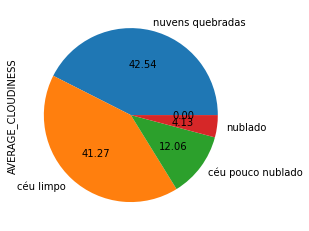

In [561]:
y_train.value_counts().plot.pie(autopct='%.2f')

<AxesSubplot:ylabel='AVERAGE_CLOUDINESS'>

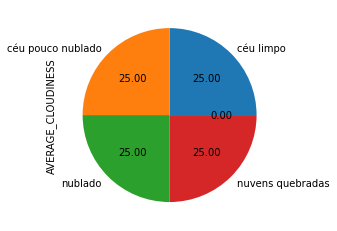

In [562]:
y_res.value_counts().plot.pie(autopct='%.2f')

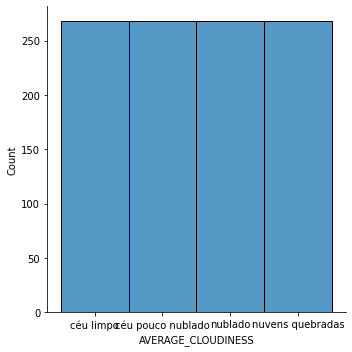

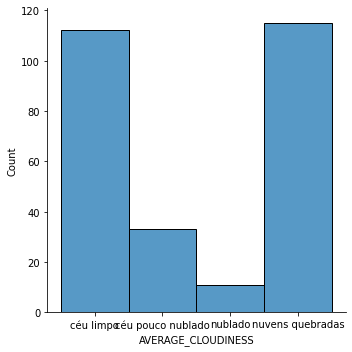

In [563]:
sns.displot(y_res)
sns.displot(y_test)

In [564]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [565]:
#I usually use Naive Bayes as a baseline for my classification tasks 
#gnb = GaussianNB()
#cv = cross_val_score(gnb,X_res,y_res,cv=5)
#print(cv)
#print(cv.mean())

In [566]:
#lr = LogisticRegression(class_weight='balanced',random_state=2021,max_iter = 90000000000000)
#cv = cross_val_score(lr,X_res,y_res,cv=5)
#print(cv)
#print(cv.mean())

In [567]:
dt = tree.DecisionTreeClassifier(random_state=2021)
cv = cross_val_score(dt,X_res,y_res,cv=5)
print(cv)
print(cv.mean())

[0.59534884 0.70232558 0.6682243  0.75233645 0.71028037]
0.6857031080199957


In [568]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_res.values,y_res.values,cv=5)
print(cv)
print(cv.mean())

[0.5627907  0.57209302 0.64018692 0.61214953 0.70560748]
0.6185655292327755


In [569]:
rf = RandomForestClassifier(random_state=2021)
cv = cross_val_score(rf,X_res,y_res,cv=5)
print(cv)
print(cv.mean())

[0.74418605 0.79069767 0.81775701 0.85046729 0.8271028 ]
0.8060421647467942


In [570]:
#svc = SVC(probability = True,random_state=2021)
#cv = cross_val_score(svc,X_res,y_res,cv=5)
#print(cv)
#print(cv.mean())

In [571]:
#from xgboost import XGBClassifier
#xgb = XGBClassifier(random_state=2021)
#cv = cross_val_score(xgb,X_res,y_res,cv=5)
#print(cv)
#print(cv.mean())

In [572]:
#lr.fit(X_res,y_res)
#dt.fit(X_res,y_res)
#knn.fit(X_res,y_res)
rf.fit(X_res,y_res)
#xgb.fit(X_res,y_res)

RandomForestClassifier(random_state=2021)

In [573]:
predictions = rf.predict(X_test)

In [574]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.datasets import make_classification

In [575]:
#ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)

In [576]:
#ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)

In [577]:
#ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

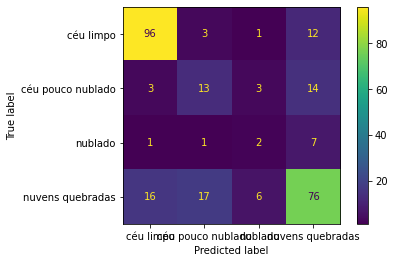

In [578]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

In [579]:
#ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)

In [580]:
testing = naCloud

In [581]:
prediction = rf.predict(testing)

In [582]:
prediction

array(['céu limpo', 'nuvens quebradas', 'céu pouco nublado',
       'nuvens quebradas', 'nuvens quebradas', 'nublado',
       'nuvens quebradas', 'nuvens quebradas', 'nuvens quebradas',
       'nuvens quebradas', 'céu limpo', 'céu pouco nublado',
       'nuvens quebradas', 'nuvens quebradas', 'nuvens quebradas',
       'céu limpo', 'nuvens quebradas', 'nublado', 'nuvens quebradas',
       'céu limpo', 'céu limpo', 'nuvens quebradas', 'nuvens quebradas',
       'nuvens quebradas', 'céu limpo', 'céu pouco nublado',
       'nuvens quebradas', 'nuvens quebradas', 'céu limpo', 'céu limpo',
       'céu limpo', 'céu limpo', 'nublado', 'céu pouco nublado',
       'nuvens quebradas', 'céu limpo', 'nuvens quebradas',
       'nuvens quebradas', 'nuvens quebradas', 'nuvens quebradas',
       'nuvens quebradas', 'nuvens quebradas', 'céu pouco nublado',
       'nuvens quebradas', 'nublado', 'céu limpo', 'nuvens quebradas',
       'nuvens quebradas', 'céu limpo', 'céu limpo', 'céu pouco nublado',
   

In [583]:
naCloud['AVERAGE_CLOUDINESS'] = prediction

In [584]:
naCloud.head()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,weekday,hour,month,unique_id,DARK,LIGHT,LOW_LIGHT,AVERAGE_CLOUDINESS
2,45.9,0.0,86.3,14.0,1017.0,93.0,0.0,1,5,8,3,1,0,0,céu limpo
4,44.0,3.5,85.5,12.0,1004.0,100.0,9.0,0,6,10,5,1,0,0,nuvens quebradas
7,34.7,19.1,68.3,17.0,1015.0,67.0,2.0,0,19,5,8,0,1,0,céu pouco nublado
8,46.5,1.3,75.4,17.0,1013.0,100.0,1.0,4,6,7,9,0,1,0,nuvens quebradas
12,40.7,26.3,80.9,13.0,1006.0,76.0,4.0,0,11,11,13,0,1,0,nuvens quebradas


In [585]:
test = pd.concat([naCloud, cloud], ignore_index=True).sort_values(by='unique_id',ascending=True)

In [586]:
test.head()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,weekday,hour,month,unique_id,DARK,LIGHT,LOW_LIGHT,AVERAGE_CLOUDINESS
599,39.2,0.0,91.0,8.0,1026.0,71.0,1.0,2,23,2,1,1,0,0,céu limpo
600,42.5,12.2,76.8,11.0,1020.0,93.0,4.0,2,20,11,2,1,0,0,nuvens quebradas
0,45.9,0.0,86.3,14.0,1017.0,93.0,0.0,1,5,8,3,1,0,0,céu limpo
601,33.2,51.7,89.9,22.0,1016.0,77.0,4.0,5,17,7,4,0,1,0,céu pouco nublado
1,44.0,3.5,85.5,12.0,1004.0,100.0,9.0,0,6,10,5,1,0,0,nuvens quebradas


In [587]:
final = test[['unique_id','AVERAGE_CLOUDINESS']]

In [588]:
final.head()

,unique_id,AVERAGE_CLOUDINESS
599,1,céu limpo
600,2,nuvens quebradas
0,3,céu limpo
601,4,céu pouco nublado
1,5,nuvens quebradas


In [590]:
training = training.drop(['AVERAGE_CLOUDINESS'],axis=1)

In [591]:
training = training.merge(final,on='unique_id',how='left')

In [592]:
training = training.drop(['unique_id','weekday','hour','month'],axis=1)

In [593]:
#training.to_csv('cloudTrain.csv',index=False)
training.to_csv('cloudTest.csv',index=False)